<p style="font-size:xx-large;color:red;font-weight:bold">First, please put your surname and username: 👉 HERE 👈</p>

<p style="font-size:xx-large;color:red;font-weight:bold;margin-top:1ex;margin-bottom:1ex">Second, please run these 👇</p>

In [3]:
%%html
<style>
#notebook-container {width:100%}
div.prompt {min-width:10ex}
.rendered_html th, .rendered_html td {text-align:left}
</style>

In [4]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Latex, Math
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np

import sympy as sp
sp.init_session()

ModuleNotFoundError: No module named 'numpy'

<p style="font-size:xx-large;color:red;font-weight:bold;margin-top:1ex">Second, please run these 👆 Note how SymPy and NumPy are imported. </p>

$\newcommand{\bra}[1]{\mathinner{\langle{#1}|}}$
$\newcommand{\ket}[1]{\mathinner{|{#1}\rangle}}$
$\newcommand{\braket}[1]{\mathinner{\langle{#1}\rangle}}$
$\newcommand{\Bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\Ket}[1]{\left|{#1}\right\rangle}$
$\DeclareMathOperator{\CNOT}{CNOT}$

# COMP 5075 Telecommunications and Device Security (2023)
# Practical 2: Understanding measurements
**Dr. Yee Wei Law**

**Table of Contents**
- [Introduction](#sec:intro)
- [Positive operator-valued measure (POVM)](#sec:povm)
  - [Task 1 (3 marks)](#t1)
  - [Task 2 (2.5 marks)](#t2)
  - [Task 3 (0 marks)](#t3)
- [Axiomatic approach to quantum operations](#sec:axiomatic)
  - [Task 4 (0 mark)](#t4)
  - [Task 5 (5 marks)](#t5)
- [Projective measurement](#sec:projective)
  - [Task 6 (7 marks)](#t6)
- [References](#sec:ref)

---
## Introduction <a name="sec:intro"></a>

This practical picks up where Practical 1 has left off.

The topics of entropies (Shannon and von Neumann) and density operator/matrix occupied the bulk of Practical 1; see the orange blocks in Fig. 1.

<p align="center"><img src="p2_concept-map.svg"></p>
Fig. 1: Conceptual building blocks of Practicals 1-3.

This practical covers the green blocks in Fig. 1:
- We shall continue from discussion of the density operator to the formulation of the *fundamental postulates of quantum mechanics* (including general/generalised measurement) in the language of the density operator.
- Discussion of the fundamental postulates of quantum mechanics inevitably leads us to the discussion of measurement operators, for which we shall discuss the *positive operator-valued measure* (POVM), *axiomatic approach to quantum operations*, and *projective measurement*.

---
## Positive operator-valued measure (POVM) <a name="sec:povm"></a>

Follow coverage of the [positive operator-valued measure (POVM)](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40515) in the Cyber Engineering Knowledge Base, and subsequently complete the following tasks.

---
### ❓ Task 1 (3 marks) <a name="t1"></a>

The purpose of this task is to implement [Example 1](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40515#example1) using NumPy functions.

Complete the code below to define the POVM elements $\mathbf{E}_1$, $\mathbf{E}_2$ and $\mathbf{E}_3$; noting that
- Lines 1-3 are worth 1 mark.
- For Lines 1-2, make sure you use the `sqrt` function from NumPy, not SymPy.
- For Line 3, use the [`identity`](https://numpy.org/doc/stable/reference/generated/numpy.identity.html) function from NumPy.
- Do not change other lines of code or introduce additional lines of code.

In [ ]:
ket0, ket1 = np.matrix([[1],[0]]), np.matrix([[0],[1]])
E1 = ... # Line 1
E2 = ... # Line 2
E3 = ... # Line 3
display(E1+E2+E3) # Sanity check

: 

Complete the code below to compute the six probabilities in [Example 1](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40515#example1) starting with $\Pr\{1|\psi_1\}$; noting that
- Lines 1-6 are worth 2 marks.
- For each of Lines 1-6, use [`@`](https://peps.python.org/pep-0465/) for matrix multiplication and the function [`item`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.item.html) to convert a 1x1 matrix into a scalar.
- For each of Lines 1-6, use the functions [`display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) and [`Math`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) to display math expressions (where each XXX is to be replaced with the correct numeric value):

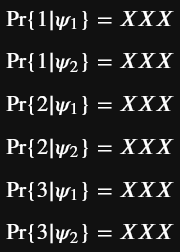
- Do not change other lines of code or introduce additional lines of code.

In [ ]:
psi1, psi2 = ket0, 1/np.sqrt(2)*(ket0+ket1)

display(Math('...' + str(...))) # Line 1
display(Math('...' + str(...))) # Line 2
display(Math('...' + str(...))) # Line 3
display(Math('...' + str(...))) # Line 4
display(Math('...' + str(...))) # Line 5
display(Math('...' + str(...))) # Line 6

: 

---
### ❓ Task 2 (2.5 marks) <a name="t2"></a>

Continuing from the previous task, suppose the POVM elements $\mathbf{E}_1$, $\mathbf{E}_2$ and $\mathbf{E}_3$ are now replaced by
$$ \begin{align}
   \mathbf{F}_1 &= \dfrac{\sqrt{2}}{1+\sqrt{2}}\ket{0}\bra{0}, \\
   \mathbf{F}_2 &= \mathbf{E}_2, \\
   \mathbf{F}_3 &= \mathbf{I} - \mathbf{F}_1 - \mathbf{F}_2.\end{align} $$
Complete the code below to determine whether $\mathbf{F}_1$, $\mathbf{F}_2$ and $\mathbf{F}_3$ are valid POVM elements; noting that
- Lines 1-2 are worth 0.5 marks because they are trivial.
- Line 3 is worth 2 marks. This line displays crucial properties of $\mathbf{F}_1$, $\mathbf{F}_2$ and $\mathbf{F}_3$ that indicate whether these matrices are [positive-semidefinite](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40513). For the missing boolean expression, use the NumPy function [`all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) and boolean operators `not`/`and`/`or`.
- Do not change other lines of code or introduce additional lines of code.

In [ ]:
F1 = ... # Line 1
F2 = E2
F3 = ... # Line 2
display(F1+F2+F3) # Sanity check
print("F1, F2 and F3 positive-semidefinite? " + str(...boolean expression...)) # Line 3

: 

---
### ❓ Task 3 (0 marks) <a name="t3"></a>

Continuing from Task 1, suppose $\Pr\{\ket{\psi_1}\}=0.4$ and $\Pr\{\ket{\psi_2}\}=0.6$. By the law of total probability, how much is the overall probability of getting measurement 3?

Type out your solution below. Use LaTeX to typeset mathematical expressions (0 mark otherwise).

**Solution**: $\Pr\{3\} = \Pr\{3|\psi_1\}\Pr\{\ket{\psi_1}\} + \Pr\{3|\psi_2\}\Pr\{\ket{\psi_2}\} = \dfrac{1}{\sqrt{2}}(0.4 + 0.6) = \dfrac{1}{\sqrt{2}}$.

---
## Axiomatic approach to quantum operations <a name="sec:axiomatic"></a>

Follow coverage of the [axiomatic approach to quantum operations](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40972) in the Cyber Engineering Knowledge Base, and subsequently complete the following tasks.

---
### ❓ Task 4 (0 mark) <a name="t4"></a>

Referring to [[HXK20](#[HXK20])], what is the primary difficulty in simulating the evolution of open quantum systems using quantum algorithms?

**Answer**: Based on [[HXK20](#[HXK20]), p. 1], the primary difficulty is while quantum algorithms are realised by unitary quantum gates (0.5 marks), the evolution of open quantum systems is generally not unitary (0.5 marks).

---
### ❓ Task 5 (5 marks) <a name="t5"></a>

Referring again to [[HXK20](#[HXK20])], the amplitude-damping channel, in operator-sum representation, models the spontaneous emission of a 2-level atom:
$$ \begin{align}
    \rho(t) &= \mathbf{M}_0\rho\mathbf{M}_0^\dagger + \mathbf{M}_1\rho\mathbf{M}_1^\dagger, \tag{5.1} \\
    \mathbf{M}_0 &= \frac{1+\exp(-\gamma t/2)}{2}\mathbf{I} + \frac{1-\exp(-\gamma t/2)}{2}\sigma_z, \tag{5.2} \\
    \mathbf{M}_1 &= \sqrt{1-\exp(-\gamma t)}\sigma^+. \tag{5.3}
\end{align} $$

Given $\sigma_z$ is the Pauli-Z matrix and $\sigma^+=\ket{0}\bra{1}$ is the Pauli raising operator (which appears in the discussion of harmonic oscillator, outside the scope of this course), complete the code below to show that
- $\mathbf{M}_0 = \begin{bmatrix}1 & 0 \\ 0 & e^{-\frac{\gamma t}{2}}\end{bmatrix}$,
- $\mathbf{M}_1 = \begin{bmatrix}0 & \sqrt{1-e^{-\gamma t}} \\ 0 & 0\end{bmatrix}$,
- and the quantum operation is trace preserving.

Note:
- Use only SymPy functions and not NumPy.
- Line 1 is worth 1 mark and it defines the symbols $\gamma$ and $t$.
- Lines 2-3 are worth 2 marks and they compute $\mathbf{M}_0$ and $\mathbf{M}_1$. 
- Line 4 is worth 2 marks and it displays $\mathbf{M}_0$, $\mathbf{M}_1$ and $\sum_i\mathbf{M}_i^\dagger\mathbf{M}_i$. Simplify the expression for $\sum_i\mathbf{M}_i^\dagger\mathbf{M}_i$ to as close to the identity matrix as possible, e.g., $\begin{bmatrix}1 & 0 \\ 0 & |\sqrt{1-e^{-\gamma t}}|^2 + e^{-\gamma t}\end{bmatrix}$. Instead of `simplify`, use one of the `expand_*` functions listed [here](https://docs.sympy.org/latest/modules/core.html).

In [ ]:
gamma, t = ... # Line 1
M0 = ... # Line 2
M1 = ... # Line 3
display(M0, M1, ...) # Line 4

: 

---
## Projective measurement <a name="sec:projective"></a>

Follow coverage of the [projective measurement](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40521) in the Cyber Engineering Knowledge Base, and subsequently complete the following tasks.

Let us use QuTiP to explore Example 1 in our discussion of [projective measurement](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40521).

Example 1 discusses the Pauli observable $\mathbf{Z}$, which is implemented in the QuTiP function [`sigmaz`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=sigmaz#qutip.operators.sigmaz).

Suppose we are interested in the statistics of measuring $\ket{0}$ using $\mathbf{Z}$, we can invoke function [`measurement_statistics_observable`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=measurement_statistics_observable#qutip.measurement.measurement_statistics_observable) on both $\ket{0}$ and $\mathbf{Z}$, as shown in the code below.

In the code below,
- [`basis(n,i)`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=basis#qutip.states.basis) creates the $i$th basis vector of the $n$-dimensional Hilbert space, which by convention takes the form $[0 \; \cdots \; 1 \; \cdots \; 0]^\top$, where the single 1 occupies the $i$th slot in the vector.
- [`sigmaz()`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=sigmaz#qutip.operators.sigmaz) instantiates a Pauli-Z matrix $\sigma_z$.
- [`measurement_statistics_observable(s, o)`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=measurement_statistics_observable#qutip.measurement.measurement_statistics_observable) computes the statistics of measuring state `s` with observable `o`.

In [ ]:
from qutip import basis, sigmaz
from qutip.measurement import measurement_statistics_observable

display(measurement_statistics_observable(basis(2,0), sigmaz()))

: 

Upon executing the code above, expect to get three outputs. Based on the explanation [here](https://qutip.org/docs/latest/guide/guide-measurement.html#obtaining-measurement-statistics-observable),
- The first output is an array of eigenvalues of observable $\sigma_z$.
- The second output is an array of eigenvectors of $\sigma_z$, which are also called the *eigenstates*. These are the possible final states once the measurement is complete.
- The third output is an array of probabilities of the eigenstates.

Therefore,
- In the example above, applying observable $\sigma_z$ to basis state $\ket{0}$ always returns result $1$ and the final eigenstate is $-\ket{0}$, which is equivalent to $\ket{0}$ barring a phase difference.
- In the example below, applying observable $\sigma_z$ to basis state $\ket{1}$ always returns result $-1$ and the final eigenstate is $-\ket{1}$, which is equivalent to $\ket{1}$ barring a phase difference.
- Consider what $\sigma_z$ is useful for when it essentially does nothing to the standard basis vectors — it is mentioned [here](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40521).

In [ ]:
display(measurement_statistics_observable(basis(2,1), sigmaz()))

: 

---
### ❓ Task 6 (7 marks) <a name="t6"></a>

Let us use QuTiP to explore Example 2 in our discussion of [projective measurement](https://lo.unisa.edu.au/mod/glossary/showentry.php?eid=40521).

In the code below,
- `rho_epr` is the Einstein–Podolsky–Rosen (EPR) state $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ instantiated using the function [`bell_state`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=bell_state#qutip.states.bell_state), converted from a ket vector to a density matrix using [`ket2dm`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=ket2dm#qutip.states.ket2dm).

Complete the rest of the code, noting that
- Line 1 is worth 2 marks and it instantiates $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$ using the function [`ket`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=ket#qutip.states.ket). `ket` creates a ket vector of specified dimensions. Your mission here is to figure out, based on the [official documentation](https://qutip.org/docs/latest/apidoc/functions.html?highlight=ket#qutip.states.ket), the two arguments to feed into `ket` to create the required two-qubit ket vectors.
- Line 2 is worth 1 mark and it creates the orthogonal projectors $\mathbf{A}_{\text{even}} = |00\rangle\langle00| + |11\rangle\langle11|$ and $\mathbf{A}_{\text{odd}} = |01\rangle\langle01| + |10\rangle\langle10|$ using the function `ket2dm`.
- Line 3 is worth 1 mark and it invokes `measurement_statistics_observable` on 1️⃣ the EPR state `rho_epr` and 2️⃣ the observable that you provide as the second argument. Spend some time thinking what this observable (matrix) should be — it is a rudimentary matrix but it is not $\sigma_x$, $\sigma_y$ or $\sigma_z$. The function for defining this matrix is listed [here](https://qutip.org/docs/latest/guide/guide-basics.html?highlight=qeye#states-and-operators).
- Line 4 is worth 2 marks and it computes `proj[0]*prob[0]+proj[1]*prob[1]+proj[2]*prob[2]+proj[3]*prob[3]` without hardcoding the number of terms. Use the Python  functions `sum` and `zip`.
- Line 5 is worth 1 mark and it invokes [`measurement_statistics_povm`](https://qutip.org/docs/latest/apidoc/functions.html?highlight=measurement_statistics_povm#qutip.measurement.measurement_statistics_povm) to perform projective measurement. ⚠ Since $\mathbf{A}_{\text{even}}$, $\mathbf{A}_{\text{odd}}$ are projectors, they are good for both POVM and projective measurement.

In [ ]:
import qutip as qt
from qutip.measurement import measurement_statistics_observable, measurement_statistics_povm

rho_epr = qt.ket2dm(qt.bell_state())
display("EPR:", rho_epr)

ket00, ket01, ket10, ket11 = ..., ..., ..., ... # Line 1
Aeven, Aodd = ..., ... # Line 2
display("Projectors:", Aeven, Aodd)

ignored, proj, prob = measurement_statistics_observable(rho_epr, ...)) # Line 3
display("Measurement in standard basis:", ...) # Line 4
display("Measurement in standard basis (validation):", 0.5*qt.ket2dm(ket00)+ 0.5*qt.ket2dm(ket11))
 
display("Measurement by projection:", ...) # Line 5
display("Measurement by projection (validation):", rho_epr)

: 

---
## References <a name="sec:ref"></a>

<a name="[HXK20]"></a>[HXK20] Z. Hu, R. Xia, and S. Kais, A quantum algorithm for evolving open quantum dynamics on quantum computing devices, *Sci Rep* **10** (2020), 3301. https://doi.org/10.1038/s41598-020-60321-x.